In [67]:
#Import Dependencies
import pandas as pd
import numpy as np

import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, ElasticNet, Lasso
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler 
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
import tensorflow
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [27]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\melis\anaconda3\envs\pythondata\lib\site-packages (0.0)


In [28]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

## ----------------------- Multilinear Regression ---------------------------------

In [54]:
file = "data_cleaning/Output/cleaned_data.csv"
df = pd.read_csv(file)
df.head()

,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,price,price_bin
0,94117,Entire home/apt,3,1.0,1.0,2.0,1,240,170.0,bin 144-180
1,94110,Entire home/apt,5,2.0,1.0,3.0,30,111,235.0,bin 216-252
2,94117,Private room,2,1.0,4.0,1.0,32,19,65.0,bin 36-72
3,94117,Private room,2,1.0,4.0,1.0,32,8,65.0,bin 36-72
4,94110,Private room,3,1.0,1.0,1.0,1,736,139.0,bin 108-144


## Create features(X) and target(y)

In [55]:
#this is your X
data = df.drop(["price", "price_bin"], axis=1)
feature_names = data.columns
data.head()

,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews
0,94117,Entire home/apt,3,1.0,1.0,2.0,1,240
1,94110,Entire home/apt,5,2.0,1.0,3.0,30,111
2,94117,Private room,2,1.0,4.0,1.0,32,19
3,94117,Private room,2,1.0,4.0,1.0,32,8
4,94110,Private room,3,1.0,1.0,1.0,1,736


In [56]:
#this is your y
target = df["price"].values.reshape(-1,1)
target

array([[170.],
       [235.],
       [ 65.],
       ...,
       [375.],
       [ 86.],
       [159.]])

## Encode Categorical Features

In [57]:
data2 = data.copy()
#convert zipcode to strings so you can encode as a category
data2["zipcode"] = data2["zipcode"].apply(str)

#encode entire data frame.  This will encode zipcode and room types
data2=pd.get_dummies(data2)
data2.head()

,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,zipcode_94014,zipcode_94102,zipcode_94103,zipcode_94104,...,zipcode_94127,zipcode_94130,zipcode_94131,zipcode_94132,zipcode_94133,zipcode_94134,zipcode_94158,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,3,1.0,1.0,2.0,1,240,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5,2.0,1.0,3.0,30,111,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,1.0,4.0,1.0,32,19,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2,1.0,4.0,1.0,32,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3,1.0,1.0,1.0,1,736,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


## Split your data

In [73]:
X_train, X_test, y_train, y_test = train_test_split(data2, target, random_state=42)
X_train.head()

,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,zipcode_94014,zipcode_94102,zipcode_94103,zipcode_94104,...,zipcode_94127,zipcode_94130,zipcode_94131,zipcode_94132,zipcode_94133,zipcode_94134,zipcode_94158,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
5444,2,1.0,1.0,1.0,2,10,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5802,2,0.0,1.0,0.0,30,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1578,4,0.0,1.0,2.0,2,2,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1789,4,2.0,2.0,2.0,30,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2818,6,3.0,1.0,3.0,30,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Scale and normalize X and y

In [64]:
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [77]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

X_train_scaled[0]



Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights',
       'number_of_reviews', 'zipcode_94014', 'zipcode_94102', 'zipcode_94103',
       'zipcode_94104', 'zipcode_94105', 'zipcode_94107', 'zipcode_94108',
       'zipcode_94109', 'zipcode_94110', 'zipcode_94111', 'zipcode_94112',
       'zipcode_94114', 'zipcode_94115', 'zipcode_94116', 'zipcode_94117',
       'zipcode_94118', 'zipcode_94121', 'zipcode_94122', 'zipcode_94123',
       'zipcode_94124', 'zipcode_94127', 'zipcode_94130', 'zipcode_94131',
       'zipcode_94132', 'zipcode_94133', 'zipcode_94134', 'zipcode_94158',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


## Fit the Linear Regression model

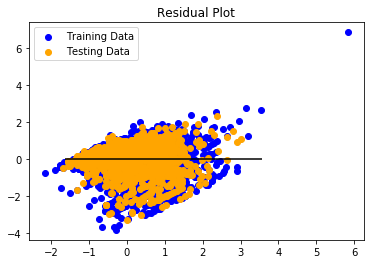

In [61]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.5094150524292558, R2: 0.5041721849812819


In [88]:
#get weights/coefficients
weights = model.coef_
print('coefficients:', weights)
#weights.type

weights_df = pd.DataFrame(weights)
#transpose dataframe
weights_df = weights_df.T

weights_df

coefficients: [[ 3.00156539e-01  3.03049745e-01 -2.70378451e-02 -2.73112377e-02
  -1.12100683e-02 -3.01605725e-02  1.47157291e+11  5.85926373e+11
   5.66475519e+11  9.42311886e+10  3.27911675e+11  5.05764840e+11
   4.75550826e+11  6.53689263e+11  7.54255026e+11  2.27774063e+11
   5.23050034e+11  6.25125845e+11  4.45940192e+11  3.62141767e+11
   6.53059750e+11  3.83514400e+11  3.58223083e+11  4.79335825e+11
   3.55584167e+11  3.79839864e+11  3.08474665e+11  3.14327484e+10
   4.28089166e+11  2.51973638e+11  4.52045491e+11  3.29355590e+11
   2.25635252e+11  6.84073993e+12  6.73531940e+12  2.55466223e+12]]


,0
0,3.001565e-01
1,3.030497e-01
2,-2.703785e-02
3,-2.731124e-02
4,-1.121007e-02
5,-3.016057e-02
6,1.471573e+11
7,5.859264e+11
8,5.664755e+11
9,9.423119e+10


In [81]:
columns = X_train.columns
print(columns)
columns.dtype

Index(['accommodates', 'bedrooms', 'bathrooms', 'beds', 'minimum_nights',
       'number_of_reviews', 'zipcode_94014', 'zipcode_94102', 'zipcode_94103',
       'zipcode_94104', 'zipcode_94105', 'zipcode_94107', 'zipcode_94108',
       'zipcode_94109', 'zipcode_94110', 'zipcode_94111', 'zipcode_94112',
       'zipcode_94114', 'zipcode_94115', 'zipcode_94116', 'zipcode_94117',
       'zipcode_94118', 'zipcode_94121', 'zipcode_94122', 'zipcode_94123',
       'zipcode_94124', 'zipcode_94127', 'zipcode_94130', 'zipcode_94131',
       'zipcode_94132', 'zipcode_94133', 'zipcode_94134', 'zipcode_94158',
       'room_type_Entire home/apt', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object')


dtype('O')

In [ ]:
##Ridge Linear Model 

## ------------------------------- Deep Learning --------------------------------------

## Create features (X) and target (y)

In [30]:
#this is your X
data = df.drop(["price", "price_bin"], axis=1)
feature_names = data.columns
data.head()

,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews
0,94117,Entire home/apt,3,1.0,1.0,2.0,1,240
1,94110,Entire home/apt,5,2.0,1.0,3.0,30,111
2,94117,Private room,2,1.0,4.0,1.0,32,19
3,94117,Private room,2,1.0,4.0,1.0,32,8
4,94110,Private room,3,1.0,1.0,1.0,1,736


In [31]:
#this is your y.  Convert to strings, even though it's already an array of strings, otherwise model will choke.
target = df["price_bin"].map(lambda x:str(x))

df.groupby("price_bin").count().index
print(target.unique())

['bin 150-200' 'bin 200-250' 'bin 50-100' 'bin 100-150' 'bin 400-450'
 'bin 450-500' 'bin 250-300' 'bin 300-350' 'bin 0-50' 'bin 350-400']


## LabelEncode features (X) - room_type and zipcode

In [15]:
#code for multi-column label encoder from stack overlow:
#https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


In [16]:
#LabelEncode room_type and zipcode.  No need to one-hot encode

data2=MultiColumnLabelEncoder(columns = ['room_type', 'zipcode']).fit_transform(data)
data2.head()

,zipcode,room_type,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews
0,14,0,3,1.0,1.0,2.0,1,240
1,8,0,5,2.0,1.0,3.0,30,111
2,14,1,2,1.0,4.0,1.0,32,19
3,14,1,2,1.0,4.0,1.0,32,8
4,8,1,3,1.0,1.0,1.0,1,736


In [17]:
data2.groupby(['room_type', 'zipcode' ]).count()

accommodates  bedrooms  bathrooms  beds  minimum_nights  \
room_type zipcode                                                            
0         0                  15        15         15    15              15   
          1                 224       224        224   224             224   
          2                 288       288        288   288             288   
          3                   5         5          5     5               5   
          4                 131       131        131   131             131   
...                         ...       ...        ...   ...             ...   
2         17                  5         5          5     5               5   
          19                  2         2          2     2               2   
          23                  1         1          1     1               1   
          24                 38        38         38    38              38   
          26                  4         4          4     4               4   

                   number_of_reviews  
room_type zipcode                     
0         0                       15  
          1                      224  
          2                      288  
          3                        5  
          4                      131  
...                              ...  
2         17                       5  
          19                       2  
          23                       1  
          24                      38  
          26                       4  

[73 rows x 6 columns]

##  Create Train Test Split


In [18]:
X_train, X_test, y_train, y_test = train_test_split(data2, target, random_state=4, test_size = .2)

## Encode y labels (label encoder and one hot encode)

In [19]:
#choose label encoder or one hot encode
#bins are already labels
2
#try each by themselves

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

len(y_test_categorical[0])
y_test_categorical[0]
len(y_train_categorical[0])

11

## Scale the features/data (X)

In [20]:
X_minmax = MinMaxScaler().fit(X_train)

X_train_scaled = X_minmax.transform(X_train)
X_test_scaled= X_minmax.transform(X_test)

X_train_scaled[0]

array([1.92307692e-01, 5.00000000e-01, 0.00000000e+00, 7.14285714e-02,
       1.07142857e-01, 7.14285714e-02, 3.00000003e-08, 5.72472594e-02])

## Train the Model (Deep Learning)

In [21]:
#get number of feature columns.  This will be the input dimension for the model.
print(f"number of features columns in X: {X_train_scaled.shape[1]}")

#get the number of target columns for the output layer.  This should be 10 as we have 10 price bins
print(f"number of target columns in y: {y_train_categorical.shape[1]}")


number of features columns in X: 8
number of target columns in y: 11


In [22]:
#create the deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create an empty sequential model
model = Sequential()

# Add the first layer where the input dimensions are the 8 columns of the training data, X_train_scaled.shape[1]
#dense is nodes, 

#input layer
model.add(Dense(200, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add a second hidden layer
model.add(Dense(200, activation='relu'))

# Add a third hidden layer
model.add(Dense(200, activation='relu'))

# Add output layer.  There are 10 columns in y_train_categorical.shape[1], same as the number of price bins
model.add(Dense(y_train_categorical.shape[1], activation="softmax"))

In [23]:
# Compile the model using categorical_crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               1800      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 11)                2211      
Total params: 84,411
Trainable params: 84,411
Non-trainable params: 0
_________________________________________________________________


In [25]:
 # Use the training data to fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Train on 6004 samples
Epoch 1/100
6004/6004 - 2s - loss: 1.7358 - accuracy: 0.3483
Epoch 2/100
6004/6004 - 1s - loss: 1.5635 - accuracy: 0.3937
Epoch 3/100
6004/6004 - 0s - loss: 1.5417 - accuracy: 0.3984
Epoch 4/100
6004/6004 - 0s - loss: 1.5250 - accuracy: 0.4022
Epoch 5/100
6004/6004 - 1s - loss: 1.5177 - accuracy: 0.4056
Epoch 6/100
6004/6004 - 0s - loss: 1.5109 - accuracy: 0.4064
Epoch 7/100
6004/6004 - 1s - loss: 1.5024 - accuracy: 0.4076
Epoch 8/100
6004/6004 - 0s - loss: 1.4992 - accuracy: 0.4099
Epoch 9/100
6004/6004 - 0s - loss: 1.4935 - accuracy: 0.4151
Epoch 10/100
6004/6004 - 1s - loss: 1.4866 - accuracy: 0.4107
Epoch 11/100
6004/6004 - 1s - loss: 1.4884 - accuracy: 0.4181
Epoch 12/100
6004/6004 - 0s - loss: 1.4782 - accuracy: 0.4207
Epoch 13/100
6004/6004 - 1s - loss: 1.4718 - accuracy: 0.4216
Epoch 14/100
6004/6004 - 0s - loss: 1.4695 - accuracy: 0.4224
Epoch 15/100
6004/6004 - 0s - loss: 1.4632 - accuracy: 0.4216
Epoch 16/100
6004/6004 - 0s - loss: 1.4619 - accuracy: 0.

## Evaluate the model

In [ ]:
#double check the array size of all train and test splits to make rows and columns line up
print(f"X_train_scaled.shape {X_train_scaled.shape}")
print(f"X_test_scaled.shape {X_test_scaled.shape}")
print(f"y_train_categorical.shape {y_train_categorical.shape}")
print(f"y_test_categorical.shape {y_test_categorical.shape}")

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

## Score the model

In [ ]:
print(f"Deep Learning Training Data Score r2: {model.score(X_train_scaled, y_train_categorical)}")
print(f"Deep Learning, Neural network Testing Data Score r2: {model.score(X_test_scaled, y_test_categorical)}")


## Hyperparameter Tuning

Use GridSearchCV to tune the model's parameters

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [250, 300, 350],
              'max_depth': [125, 150, 175]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [ ]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train_categorical)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
# Training score:
grid.score(X_train_scaled, y_train_categorical)

In [ ]:
# Testing score:
grid.score(X_test_scaled, y_test_categorical)

In [ ]:
# Make prediction and save to variable for report.
predictions = grid.predict(X_test_scaled)

In [ ]:
# Print Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test_categorical, predictions))

In [ ]:
#????????????????????  WHAT IS THIS?
%matplotlib notebook
from yellowbrick.classifier import ClassificationReport
viz = ClassificationReport(RandomForestClassifier())
viz.fit(X_train_scaled, y_train)
viz.score(X_test_scaled, y_test)
viz.finalize()
viz.show(outpath="classificationreport.png")

## Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'models.sav'
joblib.dump(model, filename)

### Correlation Matrix

In [ ]:
corrMatrix = df.corr()
print (corrMatrix)
sn.heatmap(corrMatrix, annot=True)
plt.tight_layout()
plt.autoscale()

plt.savefig('correlation_matrix.png', bbox_inches='tight', pad_inches=0.0)
plt.show()